## 1. Introduction
The goal of this project is to create a predictive model that can accurately forcast the severity of car accident. The model will offer important insights into how various factors influence accident outcomes by analysing technical details of the car, such as vehicle type, engine capacity, and vehicle manoeuvre, along with specific circumstances of the accidents, such as road surface conditions and point of impact. The car manufacturer will be able to fix design flaws thanks to these insights, and they will also help build stronger safety features, which will ultimately result in safer cars on the road. The model is in line with the manufacturer's goal to more innovation in vehicle safety.

In [ ]:
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_theme(palette="Set2")

# execution time
from timeit import default_timer as timer
from datetime import timedelta

# silence warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# increase column width
pd.set_option('display.max_colwidth', 100)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Load the data

In [ ]:
testset = pd.read_excel("testset.xlsx")
trainset = pd.read_excel("trainset.xlsx")


Splitting the dataset into features and target variable for both training and testing sets. 'Xtrain' and 'Xtest' contain the features used for training and testing the model, respectively, these include details such as vehicle type, engine capacity, and other relevant factors that could influence the outcome of an accident. 'ytrain' and 'ytest' represent the target variable 'accident_severity', which our model aims to predict.

In [ ]:
Xtrain = trainset.drop("accident_severity", axis=1)
ytrain = trainset["accident_severity"].copy()
Xtest = testset.drop("accident_severity", axis=1)
ytest = testset["accident_severity"].copy()


## Imbalanced data
after finding that the dataset is imbalanced in the group project, here we should apply the Synthetic Minority Over-sampling Technique (SMOTE) to solve the issue of class imbalance in our dataset, where some accident severities are underrepresented. In order to get a balanced class distribution in the training data, this approach creates synthetic instances of the minority class. In order to ensure that the model properly forecasts all degrees of accident severity and to avoid bias towards the majority class, it is imperative that the classes be balanced.

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(Xtrain, ytrain)


## 2. Baseline Method
#### 1. DummyClassifier

DummyClassifier from scikit-learn is utilised to create a performance baseline for our prediction model. This classifier serves as a simple reference point by making predictions based on simple rules, which, in this case, is predicting the most frequent class found in the training set. This method helps in our comprehension of the minimum accuracy levels that each advanced model must surpass to demonstrate its significance. Instead of learning from the data, the DummyClassifier uses the class distribution to create a baseline for the lowest acceptable performance.

In [ ]:
#Base model DummyClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_resampled, y_train_resampled)
y_pred = dummy_clf.predict(Xtest)  # Predict on the test set

# Evaluate the model's performance on the test set
p, r, f, _ = precision_recall_fscore_support(ytest, y_pred, average="macro", zero_division=0)
accuracy = accuracy_score(ytest, y_pred)
print("Baseline Model Performance:")
print(f"Precision: {p:.3f}")
print(f"Recall: {r:.3f}")
print(f"F-score: {f:.3f}")
print(f"Accuracy: {accuracy:.3f}")


Baseline Model Performance:

*Precision: 0.008*

*Recall: 0.333*

*F-score: 0.016*

*Accuracy: 0.025*



In addressing car accident severity prediction, I chose Decision Trees, Random Forest, AdaBoost, and Logistic Regression for evaluation and comparison. Decision Trees provide an intuitive understanding of how variables influence outcomes, while Random Forest and AdaBoost enhance prediction accuracy by addressing overfitting and focusing on challenging cases, respectively. Logistic Regression, known for its probabilistic approach, offers insights into the likelihood of accident severities. By comparing these models, we aim to identify the most effective approach for predicting accident severity, thereby informing strategies to improve vehicle safety.

#### 2. Decision Tress

In [ ]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, GridSearchCV

#Initial Decision Tree Classifier for baseline performance
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_resampled, y_train_resampled)  # Train model on the resampled training set
y_pred = tree_clf.predict(Xtest)  # Predict on the original test set

#Initial Evaluation
precision, recall, f_score, _ = precision_recall_fscore_support(ytest, y_pred, average="macro", zero_division=0)
print("Initial Decision Tree Classifier Performance:")
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F-score: {f_score:.3f}")
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy for Initial Decision Tree Classifier: {accuracy:.3f}")

#Cross-validation for baseline model evaluation
cv_scores = cross_val_score(tree_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f"Average CV Accuracy for Decision Tree: {cv_scores.mean():.3f}")


Initial Decision Tree Classifier Performance:

*Precision: 0.824, Recall: 0.873, F-score: 0.847*

*Accuracy for Initial Decision Tree Classifier: 0.913*

*Average CV Accuracy for Decision Tree: 0.941*
    

#### 3. Logistic Regression


In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

#Initial Logistic Regression model for baseline performance
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred = log_reg.predict(Xtest)

# Initial Evaluation
precision, recall, f_score, _ = precision_recall_fscore_support(ytest, y_pred, average="macro", zero_division=0)
print("Initial Logistic Regression Performance:")
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F-score: {f_score:.3f}")
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy for Initial Logistic Regression: {accuracy:.3f}")
#Cross-validation for baseline model evaluation
cv_scores = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f"Average CV Accuracy for Logistic Regression: {cv_scores.mean():.3f}")


Initial Logistic Regression Performance:

*Precision: 0.661, Recall: 0.747, F-score: 0.648*

*Accuracy for Initial Logistic Regression: 0.847*
    
*Average CV Accuracy for Logistic Regression: 0.731*

#### 4. Random Forest

In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, GridSearchCV

#Initial RandomForest Classifier for baseline performance
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)
y_pred = rf_clf.predict(Xtest)

#Initial Evaluation
precision, recall, f_score, _ = precision_recall_fscore_support(ytest, y_pred, average="macro", zero_division=0)
print("Initial RandomForest Classifier Performance:")
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F-score: {f_score:.3f}")
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy for Initial RandomForest Classifier: {accuracy:.3f}")

#Cross-validation for baseline model evaluation
cv_scores = cross_val_score(rf_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f"Average CV Accuracy for RandomForest: {cv_scores.mean():.3f}")


Initial RandomForest Classifier Performance:

*Precision: 0.960, Recall: 0.884, F-score: 0.918*

*Accuracy for Initial RandomForest Classifier: 0.954*
    
*Average CV Accuracy for RandomForest: 0.974*

#### 5.AdaBoost


In [ ]:
#AdaBoost

from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_fscore_support

#Initial AdaBoost model for baseline performance
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
ada_clf.fit(X_train_resampled, y_train_resampled)
y_pred = ada_clf.predict(Xtest)

# Initial Evaluation on test set
precision, recall, f_score, _ = precision_recall_fscore_support(ytest, y_pred, average="macro", zero_division=0)
print("Initial AdaBoost Classifier Performance:")
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F-score: {f_score:.3f}")
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy for Initial AdaBoost Classifier: {accuracy:.3f}")

#Cross-validation for model evaluation (Use resampled data)
cv_scores = cross_val_score(ada_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print(f"Average CV Accuracy for AdaBoost on Resampled Data: {cv_scores.mean():.3f}")


Initial AdaBoost Classifier Performance:

*Precision: 0.655, Recall: 0.642, F-score: 0.628*

*Accuracy for Initial AdaBoost Classifier: 0.869*

*Average CV Accuracy for AdaBoost on Resampled Data: 0.713*


## 3. Hyperparameter Tuning
Hyperparameter tuning is essential for optimizing a model's settings to enhance its performance. GridSearchCV is a key tool for this, methodically testing combinations of hyperparameters through cross-validation to identify the best configuration. It defines a grid of hyperparameter values, evaluates each, and selects the combination that produces the optimal performance. Although computationally intensive, this exhaustive approach ensures the model is finely adjusted to the specific nuances of the data it's trained on, leading to improved accuracy and effectiveness.


In [ ]:
#GridSearchCV for Hyperparameter Tuning decision tree
param_grid = {
   'max_depth': [2, 25],
    'min_samples_split': [2, 50],
    'min_samples_leaf': [1, 50],
    'max_leaf_nodes': [5000, 16000],
}

grid_search1 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1)

# Perform the hyperparameter search
grid_search1.fit(X_train_resampled, y_train_resampled)

# Best parameters found
print(f"Best parameters found: {grid_search1.best_params_}")


*Best parameters found: {'max_depth': 25, 'max_leaf_nodes': 5000, 'min_samples_leaf': 1, 'min_samples_split': 2}*


In [ ]:
#GridSearchCV for Hyperparameter Tuning logistic regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}


grid_search2 = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                           param_grid=param_grid,
                           cv=5, scoring='accuracy',
                           n_jobs=-1)

# Perform the hyperparameter search
grid_search2.fit(X_train_resampled, y_train_resampled)

# Best parameters found
print(f"Best parameters found: {grid_search2.best_params_}")


*Best parameters found: {'C': 0.001, 'solver': 'lbfgs'}*


In [ ]:
#GridSearchCV for Hyperparameter Tuning random forest

param_grid = {
    'n_estimators': [100, 200],
  'max_depth': [10, 20, None],
  'min_samples_split': [2, 4]

}

grid_search3 = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, scoring='accuracy',
                           n_jobs=-1)

# Perform the hyperparameter search
grid_search3.fit(X_train_resampled, y_train_resampled)

# Best parameters found
print(f"Best parameters found: {grid_search3.best_params_}")


*Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}*


In [ ]:
#GridSearchCV for Hyperparameter Tuning adaboost
param_grid = {
    'n_estimators': [50,  200, 300],  # List of values for the number of trees
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'base_estimator__max_depth': [1, 2, 3, 4]
}

grid_search4 = GridSearchCV(ada_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the hyperparameter search
grid_search4.fit(X_train_resampled, y_train_resampled)

# Best parameters found
print(f"Best parameters found: {grid_search4.best_params_}")


*Best parameters found: {'base_estimator__max_depth': 4, 'learning_rate': 0.1, 'n_estimators': 300}*


## 4. Model Evaluation
In the model evaluation section, we critically assess the performance of our chosen machine learning models to determine their effectiveness in predicting accident severity. This involves analyzing various metrics such as precision, recall, and F-score, which offer insights into the accuracy, reliability, and relevance of the model predictions. By comparing these metrics across models, we identify strengths and weaknesses, understand the trade-offs, and decide on the most suitable model for deployment. This thorough evaluation ensures that the final model not only predicts accurately but also aligns with the specific needs and objectives of improving vehicle safety. Through this process, we ensure that our predictive model is not just a theoretical construct but a practical tool capable of making meaningful contributions to enhancing road safety.

In [ ]:
# Final Evaluation Decision Tree
# Using the best model to predict on the test set
y_pred_opt1 = grid_search1.predict(Xtest)

precision_opt1, recall_opt1, f_score_opt1, _ = precision_recall_fscore_support(ytest, y_pred_opt1, average="macro", zero_division=0)
print("Optimized Decision Tree Classifier Performance:")
print(f"Precision: {precision_opt1:.3f}, Recall: {recall_opt1:.3f}, F-score: {f_score_opt1:.3f}")
accuracy1 = accuracy_score(ytest, y_pred_opt1)
print(f"Accuracy for Decision Tree Classifier: {accuracy1:.3f}")


Optimized Decision Tree Classifier Performance:

*Precision: 0.825, Recall: 0.841, F-score: 0.831*

*Accuracy for Decision Tree Classifier: 0.909*


In [ ]:
# Final Evaluation Logistic Regression
# Using the best model to predict on the test set
y_pred_opt2 = grid_search2.predict(Xtest)

precision_opt2, recall_opt2, f_score_opt2, _ = precision_recall_fscore_support(ytest, y_pred_opt2, average="macro", zero_division=0)
print("Optimized Logistic Regression Performance:")
print(f"Precision: {precision_opt2:.3f}, Recall: {recall_opt2:.3f}, F-score: {f_score_opt2:.3f}")
accuracy2 = accuracy_score(ytest, y_pred_opt2)
print(f"Accuracy for Logistic Regression: {accuracy2:.3f}")


Optimized Logistic Regression Performance:

*Precision: 0.673, Recall: 0.749, F-score: 0.650*

*Accuracy for Logistic Regression: 0.852*


In [ ]:
# Final Evaluation Random Forest
# Using the best model to predict on the test set
y_pred_opt3 = grid_search3.predict(Xtest)

precision_opt3, recall_opt3, f_score_opt3, _ = precision_recall_fscore_support(ytest, y_pred_opt3, average="macro", zero_division=0)
print("Optimized Random Forest Classifier Performance:")
print(f"Precision: {precision_opt3:.3f}, Recall: {recall_opt3:.3f}, F-score: {f_score_opt3:.3f}")
accuracy3 = accuracy_score(ytest, y_pred_opt3)
print(f"Accuracy for Random Forest: {accuracy3:.3f}")


Optimized Random Forest Classifier Performance:

*Precision: 0.958, Recall: 0.885, F-score: 0.918*

*Accuracy for Random Forest: 0.954*


In [ ]:
# Final Evaluation AdaBoost Classifier
# Using the best model to predict on the test set adaboost
y_pred_opt4 = grid_search4.predict(Xtest)

precision_opt4, recall_opt4, f_score_opt4, _ = precision_recall_fscore_support(ytest, y_pred_opt4, average="macro", zero_division=0)
print("Optimized AdaBoost Classifier Performance:")
print(f"Precision: {precision_opt4:.3f}, Recall: {recall_opt4:.3f}, F-score: {f_score_opt4:.3f}")
accuracy4 = accuracy_score(ytest, y_pred_opt4)
print(f"Accuracy for AdaBoost Classifier: {accuracy4:.3f}")


Optimized AdaBoost Classifier Performance:

*Precision: 0.926, Recall: 0.781, F-score: 0.839*

*Accuracy for AdaBoost Classifier: 0.919*

#### best Model confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#conf_matrix of Random Forest
conf_matrix = confusion_matrix(ytest, y_pred_opt3)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Optimized Random Forest Classifier')
plt.show()


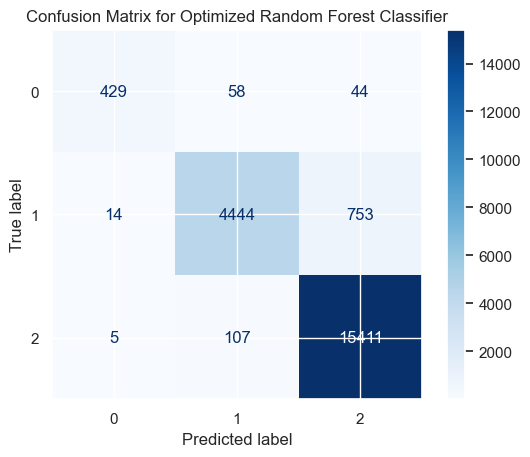

In [ ]:
#conf_matrix of AdaBoost
conf_matrix = confusion_matrix(ytest, y_pred_opt4)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Optimized AdaBoost Classifier')
plt.show()


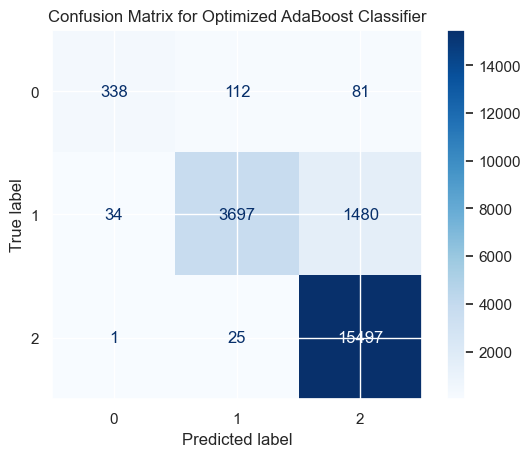

While the Random Forest Classifier does exceptionally well in accurately classifying the most fatal incidents (class 2), it exhibits considerable difficulty when classifying slight and moderate accidents (classes 0 and 1). While the AdaBoost Classifier has a slightly higher misclassification rate for the least severe incidents (class 0), it has a similar strength in recognising severe accidents. It appears that both models might do a better job of distinguishing between accident classifications that are not severe.

#### Results

In our analysis to predict accident severity, the RandomForest Classifier emerged as the standout model, delivering consistent high performance across precision (0.958), recall (0.885), and F-score (0.918). This demonstrates its robust capability to manage the complexity inherent in predicting accident outcomes. After optimisation, the AdaBoost Classifier demonstrated a significant improvement, showing an increase in accuracy to 0.926 and an increase in F-score to 0.839. This highlights the potential of ensemble approaches that are properly tuned. On the other hand, Logistic Regression had minor gains after optimisation, indicating that its accuracy (0.673) and F-score (0.650) may not accurately reflect nuances of accident severity. Even after being fine-tuned, the Decision Tree Classifier retained strong beginning metrics, demonstrating its usefulness in producing models that are easy to understand. These findings demonstrate the superiority of the RandomForest Classifier in this particular scenario and emphasise the significance of model selection and hyperparameter optimisation when addressing challenging predicting problems.

## 5. Conclusion and possible Improvement
The investigation of multiple models to forecast the severity of accidents has produced informative findings, with each model exhibiting unique advantages. After optimisation, the AdaBoost Classifier significantly improved, demonstrating its adaptability and efficiency in managing complicated datasets via ensemble learning. Even though it only shows slight benefits, Logistic Regression emphasises how crucial feature selection and model simplicity are for readability and quicker iteration. The Decision Tree Classifier demonstrated its value in producing comprehensible models that may directly advise safety improvements by providing an excellent balance between precision and recall. But the RandomForest Classifier really stood out due to its outstanding performance, which combined strong accuracy with the capacity to manage intricate feature interactions without requiring a lot of hyperparameter tweaking

Moving forward, multiple possibilities for improvement present themselves. Experimenting with more varied sets of hyperparameters for AdaBoost and Logistic Regression may reveal setups that improve their performance even more. Advanced pruning approaches might help the Decision Tree model become more refined in terms of complexity and possibly even more generalizable. Investigating feature engineering and adding more complex accident data might improve the RandomForest Classifier's predicted accuracy even more.

In summary, while our results are promising, continuous refinement and exploration of additional models, like deep learning techniques or more advanced ensemble methods, could offer new perspectives and improvements. Further improvements in model performance could be obtained by adding real-time data, investigating different feature selection techniques, and utilising more complex hyperparameter optimisation strategies, such as Bayesian optimisation which tried to implement but faced with hardware limits, which would bring the project one step closer to the objective of optimising vehicle safety through data-driven insights.